AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

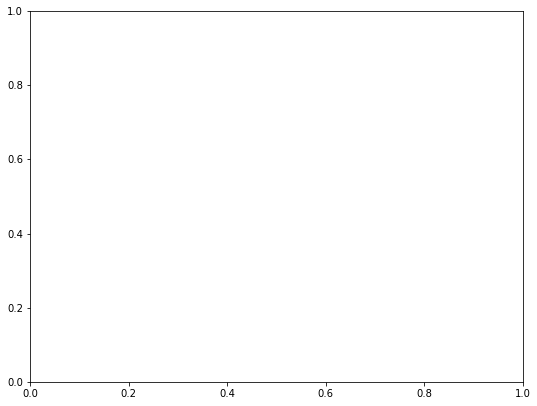

In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt

class PiEstimation():
    def __init__(self,n_trials):
        self.n_trials=n_trials

    def classify_point(self,x,y):
        return True if (pow(x,2)+ pow(y,2))<=1 else False 

    def estimate_pi(self,plot=False):
        circle_points=0
        real_pi=3.14159265
        points=[]
        results=[]

        for i in range (self.n_trials):
            x=random.uniform(-1,1)
            y=random.uniform(-1,1)
            if self.classify_point(x,y) is True:
                circle_points+=1
                r= 1
            else:
                r= 0
            cords=(x,y)
            points.append(cords)
            results.append(r)
        
        '''pi formula:
        area of circle= pi*pow(r,2)
        aera of a square=pow(2*r,2)==> 4*pow(r,2)

        area of circle/aera of a square = pi*pow(r,2)/4*pow(r,2) ==>pi/4
        pi=4*(area of circle/aera of a square)
        '''
        pi=4*(circle_points/self.n_trials)
        error=np.round(abs(pi-real_pi),4)
        colors=['red','blue']

        if plot is True:
            for (x, y), label in zip(points, results):
                plt.scatter(x, y, color=colors[label])
            plt.Circle((0,0),radius=1,fill=False, color="green", linewidth=20)
            plt.title("# of trials: {},\nError is: {}".format(self.n_trials,error),size=12, family='serif',position=(0.5,1.1))
        else: 
            plt.subtitle("Pi Estimation based on {} trials is: {},\nReal pi is 3.14159265\nError is: {}".format(self.n_trials,pi,error),size=12, family='serif',position=(0.5,1.1))

        return pi,error

# ===========================  Check single trial number: ===========================
# n_trials=150
# p=PiEstimation(n_trials)
# pi,error=p.estimate_pi(plot=True)
# print("Pi Estimation based on {} trials is: {},real pi is 3.14159265\nError is: {}".format(n_trials,pi,error))


#Check Multiple trials numbers:

# ===========================  create number of trials list:  ===========================
interval=10
trials=[]
for i in range (0,6):
    interval+=10
    trials.append(int(interval))

def monte_carlo_pi(trials):
    errors=[]
    columns=3
    rows=int(np.ceil(len(trials)/columns))
    plt.figure(figsize=(rows*15,columns*5))
    plt.xlim=([-1,1])
    plt.ylim=([-1,1])

    for idx,n_trials in enumerate(trials):
        real_pi=3.14159265
        p=PiEstimation(n_trials) #call PiEstimation class
        plt.subplot(rows,columns,idx+1)
        pi,error=p.estimate_pi(plot=False)
        errors.append(error)
        plt.show()
    return errors

errors=monte_carlo_pi(trials)
plt.plot(trials,errors)
plt.show()